# Food Demand Forecasting Challenge

---

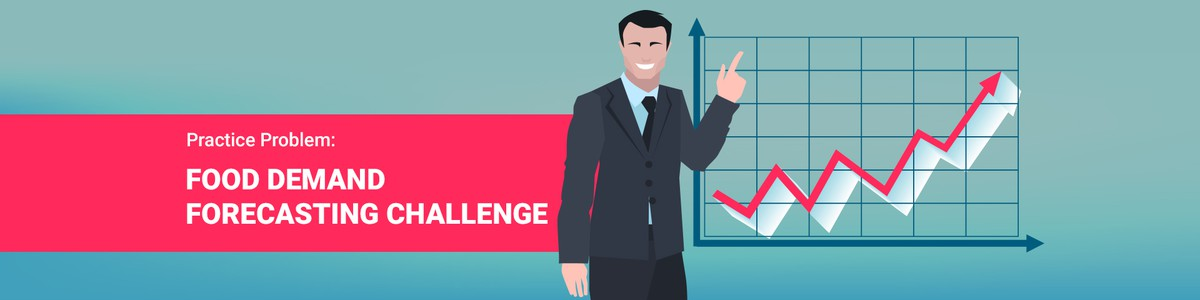




Our client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants us to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  


*   **Historical data of demand for a product-center combination (Weeks: 1 to 145)**
*   **Product(Meal) features such as category, sub-category, current price and discount**
*   **Information for fulfillment center like center area, city information etc.**


---




### **We'll be creating a ML Model that can help them in forecasting the weekly demand for next 10 weeks!**


---

In [1]:
## Importing all required libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.display.max_rows = None
pd.options.display.max_columns = None



---
### **About Data:**
- **ID**: Unique ID
- **week**:	Week No
- **center_id**:	Unique ID for fulfillment center
- **meal_id**:	Unique ID for Meal
- **checkout_price**:	Final price including discount, taxes & delivery charges
- **base_price**:	Base price of the meal
- **emailer_for_promotion**:	Emailer sent for promotion of meal
- **homepage_featured**:	Meal featured at homepage
- **num_orders**: Orders Count


---



In [2]:
## Reading the training data....
data = pd.read_csv('train.csv')
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
## Creating copy of original data set...
df = data.copy()

## No. of rows and columns in the data set....
print("Total Rows in training set is: " , df.shape[0] , 
      "\nTotal Columns in training set is:" , df.shape[1])

Total Rows in training set is:  456548 
Total Columns in training set is: 9


# **Feature Engineering:**

In [4]:
## Reading Test Data....
data_test = pd.read_csv("test_QoiMO9B.csv")
data_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [5]:
## Creating copy of original Test data set...
df_test = data_test.copy()

In [6]:
## Adding "num_orders" feature with Random Value to Test data befor merging with Training Data......
df_test['num_orders'] = 999999

## Merging the Train and Test Data sets....
df=pd.concat([df,df_test],axis=0)
print("Dimensions of resultant set is:" , df.shape)

Dimensions of resultant set is: (489121, 9)


In [7]:
## Sorting the data set with respect to "Center Id" , "Meal Id" and "Week"...
df = df.sort_values(['center_id' , 'meal_id' , 'week'])

In [8]:
## Creating a sales window of 5 weeks....
## considering in these 5 weeks maximum buying persona of particular centre with 
## particular meal is captured.....

week_lis = []   ## Updated week week list...
m = 0

for i in df.week.unique():
    m = m + 1
    if m == 1:
      temp = df[df['week'] == i].shape[0]
      week_lis.extend([1]*temp)
    elif m == 2:
      temp = df[df['week'] == i].shape[0]
      week_lis.extend([2]*temp)
    elif m == 3:
      temp = df[df['week'] == i].shape[0]
      week_lis.extend([3]*temp)
    elif m == 4:
      temp = df[df['week'] == i].shape[0]
      week_lis.extend([4]*temp)
    elif m == 5:
      temp = df[df['week'] == i].shape[0]
      week_lis.extend([5]*temp)
      m = 0


## Converting list to Series....
week_lis = pd.Series(week_lis)

## Adding the updated weeks feature to main data frame...
df['week_updated'] = week_lis

In [9]:
## We can't consider "Center_Id", "Meal_Id" and "week_updated" features as numerical entries....
## lets convert them to objects....
df['center_id'] = df['center_id'].astype('object')
df['meal_id'] = df['meal_id'].astype('object')
df['week_updated'] = df['week_updated'].astype('object')

In [10]:
## Printing information of all features of data frame....
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 2370 to 358495
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     489121 non-null  int64  
 1   week                   489121 non-null  int64  
 2   center_id              489121 non-null  object 
 3   meal_id                489121 non-null  object 
 4   checkout_price         489121 non-null  float64
 5   base_price             489121 non-null  float64
 6   emailer_for_promotion  489121 non-null  int64  
 7   homepage_featured      489121 non-null  int64  
 8   num_orders             489121 non-null  int64  
 9   week_updated           489121 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 41.0+ MB


In [11]:
## Creating a new feature - "Year"....
df['Year']=(df['week']/52).astype('int64')

Year_dict = { 0:'Year1',  1:'Year2',  2:'Year3' }
df['Year'] = df['Year'].map(Year_dict) 

## Creating another new feature - "Quarter of the year"....
df['Quarter_of_year']=(df['week']/13).astype('int64')

Quarter_dict = {0:'Q1',  1:'Q2',  2:'Q3',  3:'Q4',  4:'Q1',  5:'Q2',  6:'Q3',  
                7:'Q4',  8:'Q1',  9:'Q2', 10:'Q3', 11:'Q4'}
df['Quarter_of_year'] = df['Quarter_of_year'].map(Quarter_dict)

In [12]:
## Encoding "Center_Id", "Meal_Id" and "week_updated" features....
cate = pd.get_dummies(df[["center_id" , "meal_id" , "week_updated" , "Quarter_of_year" , "Year"]] , drop_first = True)

## Adding dummy variables to "df"...
df = pd.concat([df , cate] , axis = 1)

In [13]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,week_updated,Year,Quarter_of_year,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,week_updated_2,week_updated_3,week_updated_4,week_updated_5,Quarter_of_year_Q2,Quarter_of_year_Q3,Quarter_of_year_Q4,Year_Year2,Year_Year3
2370,1436842,1,10,1062,181.39,181.39,0,0,865,1,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5273,1205013,2,10,1062,183.36,182.36,0,0,782,2,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8175,1447751,3,10,1062,184.36,182.36,0,0,851,3,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11064,1014968,4,10,1062,182.36,183.36,0,0,1202,4,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
13918,1003563,5,10,1062,183.39,181.39,0,0,958,5,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# **Meal Information Data:**

In [14]:
## Reading Meal Information data.....
df_meal = pd.read_csv("meal_info.csv")
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [15]:
print("Unique Categories of Meals are:" , df_meal.category.unique())

Unique Categories of Meals are: ['Beverages' 'Extras' 'Soup' 'Other Snacks' 'Salad' 'Rice Bowl' 'Starters'
 'Sandwich' 'Pasta' 'Desert' 'Biryani' 'Pizza' 'Fish' 'Seafood']


In [16]:
print("Unique Cuisines of Meal are:" , df_meal.cuisine.unique())

Unique Cuisines of Meal are: ['Thai' 'Indian' 'Italian' 'Continental']


In [17]:
## Merging the Meal Features with main data set "df"....
df = pd.merge(df , df_meal, on = 'meal_id')

In [18]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,week_updated,Year,Quarter_of_year,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,week_updated_2,week_updated_3,week_updated_4,week_updated_5,Quarter_of_year_Q2,Quarter_of_year_Q3,Quarter_of_year_Q4,Year_Year2,Year_Year3,category,cuisine
0,1436842,1,10,1062,181.39,181.39,0,0,865,1,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Beverages,Italian
1,1205013,2,10,1062,183.36,182.36,0,0,782,2,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Beverages,Italian
2,1447751,3,10,1062,184.36,182.36,0,0,851,3,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Beverages,Italian
3,1014968,4,10,1062,182.36,183.36,0,0,1202,4,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Beverages,Italian
4,1003563,5,10,1062,183.39,181.39,0,0,958,5,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Beverages,Italian


In [19]:
## Creating dummy for "meal_cate" feature.....
meal_cate_dummy = pd.get_dummies(df['category'] , drop_first = True , prefix='Cate', prefix_sep='_')

## Creating dummy for "meal_cuis" feature.....
meal_cuis_dummy = pd.get_dummies(df['cuisine'] , drop_first = True , prefix='Cuis', prefix_sep='_')

In [20]:
## Adding dummy variables to "df"...
df = pd.concat([df , meal_cate_dummy ,meal_cuis_dummy] , axis = 1)

# **Food Center Data:**

In [21]:
## Reading Food Center Information data...
data_centre = pd.read_csv("fulfilment_center_info.csv")
data_centre.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [22]:
## Merging the Center Features with main data set "df"....
df = pd.merge(df , data_centre[['center_type' , 'city_code' , 'op_area' , 'center_id']], 
              on = 'center_id')

In [23]:
## Creating dummy for "center_type" feature.....
center_type_dummy = pd.get_dummies(df['center_type'] , drop_first = True , prefix='Center_type')

In [24]:
## Adding dummy variables to "df"...
df = pd.concat([df , center_type_dummy] , axis = 1)

In [25]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,week_updated,Year,Quarter_of_year,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,week_updated_2,week_updated_3,week_updated_4,week_updated_5,Quarter_of_year_Q2,Quarter_of_year_Q3,Quarter_of_year_Q4,Year_Year2,Year_Year3,category,cuisine,Cate_Biryani,Cate_Desert,Cate_Extras,Cate_Fish,Cate_Other Snacks,Cate_Pasta,Cate_Pizza,Cate_Rice Bowl,Cate_Salad,Cate_Sandwich,Cate_Seafood,Cate_Soup,Cate_Starters,Cuis_Indian,Cuis_Italian,Cuis_Thai,center_type,city_code,op_area,Center_type_TYPE_B,Center_type_TYPE_C
0,1436842,1,10,1062,181.39,181.39,0,0,865,1,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Beverages,Italian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,TYPE_B,590,6.3,1,0
1,1205013,2,10,1062,183.36,182.36,0,0,782,2,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Beverages,Italian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,TYPE_B,590,6.3,1,0
2,1447751,3,10,1062,184.36,182.36,0,0,851,3,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Beverages,Italian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,TYPE_B,590,6.3,1,0
3,1014968,4,10,1062,182.36,183.36,0,0,1202,4,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Beverages,Italian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,TYPE_B,590,6.3,1,0
4,1003563,5,10,1062,183.39,181.39,0,0,958,5,Year1,Q1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

**Final Pre-processing....**

In [26]:
## Removing all unwanted features....
df1 = df.drop(['cuisine' , 'category', 'base_price' , 'center_type' , 'city_code' , 
         'week_updated' , 'center_id' , 'meal_id' , 'Year' , 'Quarter_of_year'] , axis = 1)

In [27]:
df1.head()

,id,week,checkout_price,emailer_for_promotion,homepage_featured,num_orders,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,week_updated_2,week_updated_3,week_updated_4,week_updated_5,Quarter_of_year_Q2,Quarter_of_year_Q3,Quarter_of_year_Q4,Year_Year2,Year_Year3,Cate_Biryani,Cate_Desert,Cate_Extras,Cate_Fish,Cate_Other Snacks,Cate_Pasta,Cate_Pizza,Cate_Rice Bowl,Cate_Salad,Cate_Sandwich,Cate_Seafood,Cate_Soup,Cate_Starters,Cuis_Indian,Cuis_Italian,Cuis_Thai,op_area,Center_type_TYPE_B,Center_type_TYPE_C
0,1436842,1,181.39,0,0,865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0
1,1205013,2,183.36,0,0,782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0
2,1447751,3,184.36,0,0,851,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0
3,1014968,4,182.36,0,0,1202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0
4,1003563,5,183.39,0,0,958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0


In [28]:
df1.shape

(489121, 160)

# **Model Building :**

In [29]:
## Spliting back train and test data in terms of weeks....
df_test = df1[df1['week'].isin(range(146,160))]
df_train = df1[df1['week'].isin(range(1,146))]

In [30]:
df_train.head()

,id,week,checkout_price,emailer_for_promotion,homepage_featured,num_orders,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,week_updated_2,week_updated_3,week_updated_4,week_updated_5,Quarter_of_year_Q2,Quarter_of_year_Q3,Quarter_of_year_Q4,Year_Year2,Year_Year3,Cate_Biryani,Cate_Desert,Cate_Extras,Cate_Fish,Cate_Other Snacks,Cate_Pasta,Cate_Pizza,Cate_Rice Bowl,Cate_Salad,Cate_Sandwich,Cate_Seafood,Cate_Soup,Cate_Starters,Cuis_Indian,Cuis_Italian,Cuis_Thai,op_area,Center_type_TYPE_B,Center_type_TYPE_C
0,1436842,1,181.39,0,0,865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0
1,1205013,2,183.36,0,0,782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0
2,1447751,3,184.36,0,0,851,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0
3,1014968,4,182.36,0,0,1202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0
4,1003563,5,183.39,0,0,958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0


In [31]:
## Resetting the index of train set....
df_train.reset_index(inplace = True)

In [32]:
## Dividing into Categorical and Numerical variables....
cate = df_train.drop(['num_orders' , 'week' , 'id' , 'checkout_price' , 'op_area'] , axis = 1)
x = df_train[['checkout_price' , 'op_area']]

## Scaling data:

In [33]:
## Scaling the data set...
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)              ## "x" is only 'checkout_price' and 'operational area' features....

## 'x_new' - scaled features....
x_new = pd.DataFrame(data = scaler.transform(x) , columns = x.columns)

In [34]:
temp = df_train[['id' , 'week' , 'num_orders']]  ## Untouched features....
df_train = pd.concat([temp , x_new , cate] , axis = 1)
df_train.head()

,id,week,num_orders,checkout_price,op_area,index,emailer_for_promotion,homepage_featured,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,week_updated_2,week_updated_3,week_updated_4,week_updated_5,Quarter_of_year_Q2,Quarter_of_year_Q3,Quarter_of_year_Q4,Year_Year2,Year_Year3,Cate_Biryani,Cate_Desert,Cate_Extras,Cate_Fish,Cate_Other Snacks,Cate_Pasta,Cate_Pizza,Cate_Rice Bowl,Cate_Salad,Cate_Sandwich,Cate_Seafood,Cate_Soup,Cate_Starters,Cuis_Indian,Cuis_Italian,Cuis_Thai,Center_type_TYPE_B,Center_type_TYPE_C
0,1436842,1,865,0.206672,0.885246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1205013,2,782,0.208954,0.885246,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1447751,3,851,0.210112,0.885246,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1014968,4,1202,0.207796,0.885246,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,1003563,5,958,0.208989,0.885246,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## **Train - Test Split for training:**

In [35]:
## Making Train - Test split in term of weeks....
## Taking last 10 weeks for testing the model...
train = df_train[df_train['week'].isin(range(1,136))]
test = df_train[df_train['week'].isin(range(136,146))]

## Spliting into dependent and independent variables....
x_train = train.drop(['num_orders' , 'week' , 'id' , 'index'] , axis = 1)
y_train = train['num_orders']

## Spliting into dependent and independent variables....
x_test = test.drop(['num_orders' , 'week' , 'id' , 'index'] , axis = 1)
y_test = test['num_orders']

### **Applying RANDOM FOREST REGRESSION:**

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train , y_train)

RandomForestRegressor()

In [38]:
## Using metrics....
from sklearn import metrics

## Training accuracy score...
print("Training Accuracy score:" , rf_reg.score(x_train , y_train)*100 , "%")
print("Test Accuracy score:" , rf_reg.score(x_test , y_test)*100 , "%")

## printing test root mean squared error score..... 
print("RMSLE is :" , np.sqrt(metrics.mean_squared_log_error(y_test , rf_reg.predict(x_test))*100))

Training Accuracy score: 97.83956748401918 %
Test Accuracy score: 81.16177008048004 %
RMSLE is : 5.421284369167916


(0.0, 4000.0)

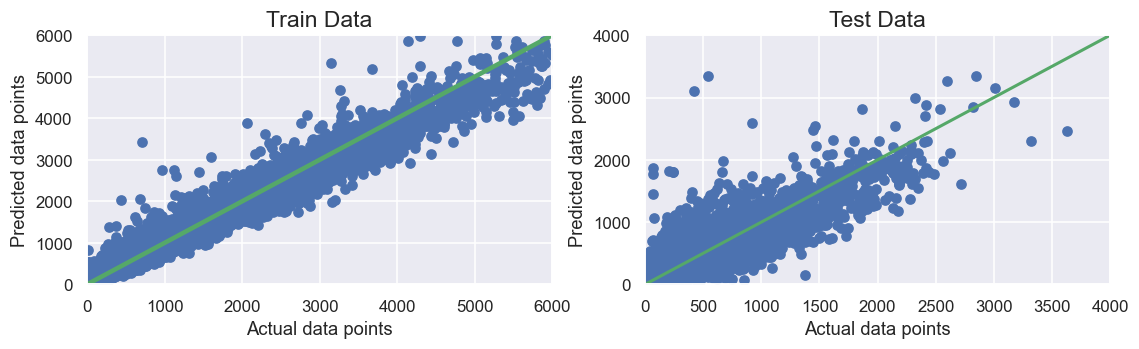

In [39]:
## plotting Train data....
## More concentration on red line -> More the model accuracy.
plt.figure(dpi = 110 , figsize = (12 , 3))
plt.subplot(1,2,1)
plt.scatter(x = y_train , y = rf_reg.predict(x_train))
plt.plot([0, 6000] , [0 , 6000] , '-' , linewidth=3 , color = 'g')
plt.title("Train Data" , fontsize = 15)
plt.xlabel("Actual data points" , fontsize = 12)
plt.ylabel("Predicted data points" , fontsize = 12)
plt.xlim(0 , 6000)
plt.ylim(0 , 6000)

## plotting Test results....
## More concentration on red line -> More the model accuracy.
plt.subplot(1,2,2)
plt.scatter(x = y_test , y = rf_reg.predict(x_test))
plt.plot([0, 4000] , [0 , 4000] , '-' , linewidth=2 , color = 'g')
plt.title("Test Data" , fontsize = 15)
plt.xlabel("Actual data points" , fontsize = 12)
plt.ylabel("Predicted data points" , fontsize = 12)
plt.xlim(0 , 4000)
plt.ylim(0 , 4000)

#### **Applying Hyperparameter Optimization:**

In [40]:
from sklearn.model_selection import GridSearchCV

## Parameter:
n_estimators = [100 , 150 , 200 , 250]
criterion = ["mse" , "mae"]
max_depth = [5 , 7 , 9 , 11]
min_samples_leaf = [int(x) for x in np.linspace(2 , 10 , 5)]
max_features = ["auto", "sqrt"]
max_leaf_nodes = [int(x) for x in np.linspace(10 , 40 , 5)]

## Creating Dictionary....
para_dics = {'n_estimators':n_estimators , 'criterion':criterion , 'max_depth':max_depth , 
             'min_samples_leaf':min_samples_leaf , 'max_features':max_features , 'max_leaf_nodes':max_leaf_nodes}

In [ ]:
## Creating regression object.....
rf_reg_tunned = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf_reg_tunned, param_grid = para_dics , scoring='neg_mean_squared_log_error', 
                           cv=2, n_jobs=-1 , verbose=2)
grid_search.fit(x_train , y_train)

In [ ]:
print("Best parameters are :\n" , grid_search.best_params_)
print("Best Score is :" , grid_search.best_score_)

## Creating estimator with best parameters obtained....
estimator_rf_tunned = grid_search.best_estimator_

In [ ]:
## Training accuracy score...
print("Training Accuracy score:" , estimator_rf_tunned.score(x_train , y_train)*100 , "%")
print("Test Accuracy score:" , estimator_rf_tunned.score(x_test , y_test)*100 , "%")

## printing test root mean squared error score..... 
print("RMSLE is :" , np.sqrt(metrics.mean_squared_log_error(y_test , estimator_rf_tunned.predict(x_test))*100))

In [ ]:
## plotting Train data....
## More concentration on red line -> More the model accuracy....
plt.figure(dpi = 110 , figsize = (12 , 3))
plt.subplot(1,2,1)
plt.scatter(x = y_train , y = estimator_rf_tunned.predict(x_train))
plt.plot([0, 6000] , [0 , 6000] , '-' , linewidth=3 , color = 'g')
plt.title("Train Data on Tunned Model" , fontsize = 15)
plt.xlabel("Actual data points" , fontsize = 12)
plt.ylabel("Predicted data points" , fontsize = 12)
plt.xlim(0 , 6000)
plt.ylim(0 , 6000)

## plotting Test results....
## More concentration on red line -> More the model accuracy.
plt.subplot(1,2,2)
plt.scatter(x = y_test , y = estimator_rf_tunned.predict(x_test))
plt.plot([0, 4000] , [0 , 4000] , '-' , linewidth=2 , color = 'g')
plt.title("Test Data on Tunned Model" , fontsize = 15)
plt.xlabel("Actual data points" , fontsize = 12)
plt.ylabel("Predicted data points" , fontsize = 12)
plt.xlim(0 , 4000)
plt.ylim(0 , 4000)

- **We cane use above code to tune the model. Due to lack of machine efficiency i am leaving these steps.**

# **Preprocessing Test Data....**

In [42]:
## Showing Test Data frame....
data_test = pd.read_csv("test_QoiMO9B.csv")
data_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [43]:
## Precprocessed but unscaled test data is...
df_test.head()

,id,week,checkout_price,emailer_for_promotion,homepage_featured,num_orders,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,week_updated_2,week_updated_3,week_updated_4,week_updated_5,Quarter_of_year_Q2,Quarter_of_year_Q3,Quarter_of_year_Q4,Year_Year2,Year_Year3,Cate_Biryani,Cate_Desert,Cate_Extras,Cate_Fish,Cate_Other Snacks,Cate_Pasta,Cate_Pizza,Cate_Rice Bowl,Cate_Salad,Cate_Sandwich,Cate_Seafood,Cate_Soup,Cate_Starters,Cuis_Indian,Cuis_Italian,Cuis_Thai,op_area,Center_type_TYPE_B,Center_type_TYPE_C
145,1177098,146,190.18,0,0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0
146,1486011,147,193.03,0,0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0
147,1301735,148,191.09,0,0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0
148,1273097,149,189.15,0,0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0
149,1450902,150,194.06,0,0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.3,1,0


In [46]:
## Setting the index as per "id"....
df_test_ind = df_test.set_index('id')

## Resetting the index of test data as per the index of submission file....
## Reading submission file....
submission = pd.read_csv('sample_submission_hSlSoT6.csv')
df1_test = submission.copy()

## Reseting the index....
df1_test = df1_test.set_index('id')

df_test_new = df1_test.merge(df_test_ind, left_index=True, right_index=True)

In [47]:
df_test_new.head()

,num_orders_x,week,checkout_price,emailer_for_promotion,homepage_featured,num_orders_y,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,week_updated_2,week_updated_3,week_updated_4,week_updated_5,Quarter_of_year_Q2,Quarter_of_year_Q3,Quarter_of_year_Q4,Year_Year2,Year_Year3,Cate_Biryani,Cate_Desert,Cate_Extras,Cate_Fish,Cate_Other Snacks,Cate_Pasta,Cate_Pizza,Cate_Rice Bowl,Cate_Salad,Cate_Sandwich,Cate_Seafood,Cate_Soup,Cate_Starters,Cuis_Indian,Cuis_Italian,Cuis_Thai,op_area,Center_type_TYPE_B,Center_type_TYPE_C
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1028232,0,146,158.11,0,0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,0,1
1127204,0,146,160.11,0,0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,0,1
1212707,0,146,157.14,0,0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,0,1
1082698,0,146,162.02,0,0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,1
1400926,0,146,163.93,0,0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [48]:
## Dropping unwanted features....
df_test_new.drop(['week' , 'num_orders_x' , 'num_orders_y'] , axis = 1 , inplace = True)
print("The dimensions of resultant set is :" , df_test_new.shape)

The dimensions of resultant set is : (32573, 157)


In [49]:
## Creating the copy of data frame....
final_test_df = df_test_new.copy()

In [50]:
## scaling the test data....
x_scaled_test = pd.DataFrame(scaler.transform(final_test_df[['checkout_price' , 'op_area']]) , 
                             columns = ['checkout_price' , 'op_area'] , index = final_test_df.index)
cate_test = final_test_df.drop(['checkout_price' , 'op_area'] , axis = 1)
cate_test.index = final_test_df.index

## Final test data set, ready to feed into the model....
final_test_df = pd.concat([x_scaled_test , cate_test] , axis = 1)

In [51]:
final_test_df.head()

,checkout_price,op_area,emailer_for_promotion,homepage_featured,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,week_updated_2,week_updated_3,week_updated_4,week_updated_5,Quarter_of_year_Q2,Quarter_of_year_Q3,Quarter_of_year_Q4,Year_Year2,Year_Year3,Cate_Biryani,Cate_Desert,Cate_Extras,Cate_Fish,Cate_Other Snacks,Cate_Pasta,Cate_Pizza,Cate_Rice Bowl,Cate_Salad,Cate_Sandwich,Cate_Seafood,Cate_Soup,Cate_Starters,Cuis_Indian,Cuis_Italian,Cuis_Thai,Center_type_TYPE_B,Center_type_TYPE_C
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1028232,0.179706,0.180328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1127204,0.182022,0.180328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1212707,0.178582,0.180328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1082698,0.184235,0.180328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1400926,0.186447,0.180328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [52]:
## Predicting the "Number of orders" using created RANDOM FOREST REGRESSION MODEL....
results = rf_reg.predict(final_test_df)

In [53]:
## Adding our prediction to our submission file....
submission['num_orders'] = results.astype('int64')

In [54]:
submission.head()

,id,num_orders
0,1028232,190
1,1127204,220
2,1212707,233
3,1082698,59
4,1400926,36


In [55]:
## Converting Submission data frame to csv file.....
submission.to_csv('submission.csv' , index = False)

In [56]:
import pickle

## Generting the pickle file of created model....
pickle.dump(rf_reg , open('model_RF_Reg.pkl' , 'wb'))

---

---